# Computable Document prototype: An interactive ELC report

In [12]:
#@title
#%%capture
import numpy as np #Linear algebra
import pandas as pd #Time series, datetime object manipulation 
import matplotlib.pyplot as plt #plotting
#import seaborn as sb
#plt.style.use('fivethirtyeight') #Plot style preferred by author.

import calendar
from tabulate import tabulate #pretty display of tables

import plotly.express as px #Plotly interactive plots
from plotly.subplots import make_subplots

import warnings #suppress warning messages -- declutter
warnings.filterwarnings('ignore')

!pip install calmap #Calendar heat map
#!pip install qgrid #dynamic manipulation of tables.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Preprocessing: Import ELC sign-in data from a URL 

After the data is imported, month and day identifiers, which are strings, are replaced with integers.  This operations allows the imported dataset to be cast into a time series type and perform further operations on it.  This intermediate step of strings -> integers is necessary for the python functions for time series analysis to accept the data as arguments. 

In [2]:
#@title
#url = 'https://raw.githubusercontent.com/dnaneet/ELC/master/DATA/DATAf19.csv' #data is stored at this URL
df = pd.read_csv('DATA_AY1920.csv') #df = dataframe.  Read data from the URL
#df.head(5) #First 5 entries.  Data exploration.  Gives the reader an idea of what the ELC data looks like.
df=df.replace({'December': 12, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 
               'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 
               'October': 10, 'November': 11}) #replace month names with month numbers

df=df.replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3,
               'Thursday': 4, 'Friday': 5, 'Saturday': 6,
               'Sunday': 7}) #replace day names with day numbers
#df.head(5) #print data frame.  Data exploration.         
#df.dtypes #Uncomment this line and run if you want to show what the datatypes of each column in the time series is 
df['mdy'] = pd.to_datetime((df.year*10000+df.month*100+df.date).apply(str),format='%Y%m%d')


# Visualization of ELC usage data
Now that the ELC visit data has been cast into the appropriate format, exploratory visualization is performed. The exploratory steps are alongside lines of code, as comments.

## Sign-ins by date 

The ELC has peak usage in the 2nd or 3rd week of September.  This can be correlated to Mechanics of Materials students requiring help with Statics

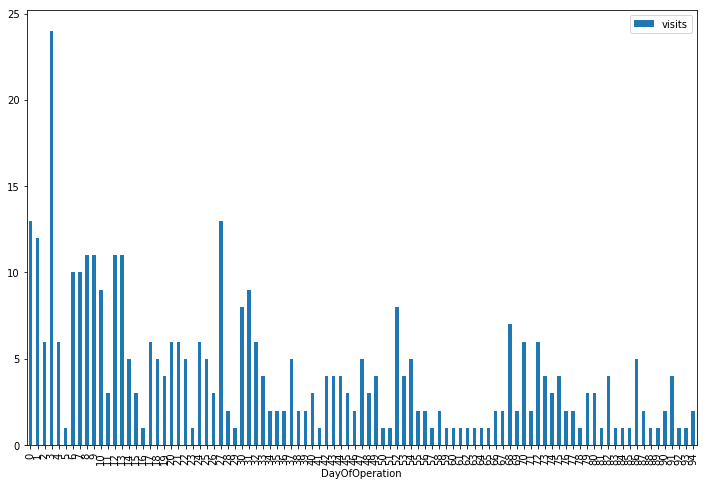

In [28]:
#@title
n=5 #last n records
obj_mdy = df['visits'].groupby(df['mdy']).count() #Grouping number of visits by day
#obj_mdy.tail(n) #What does this grouped data look like?

xdata = np.array(obj_mdy.reset_index())[:,0]
ydata = np.array(obj_mdy.reset_index())[:,1]


df_mdy = pd.DataFrame({'mdy': xdata, 'visits': ydata})

fig = px.bar(df_mdy, x="mdy", y="visits")
fig.show()
#df_mdy.sample(n=5, random_state=1)
#df_day_hour['dayName'] = df_day_hour['day'].replace({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}) #replace day names with day numbers
#ax = obj_mdy.tail(len(df)).plot(kind='bar')
#ax.set_xticklabels(obj_mdy.tail(len(df)).index.strftime('%b-%d-%y'));
#plt.xlabel('Date')
#plt.ylabel('Number of sign-ins')
#plt.show()

#df_mdy.head(5)
df_mdy['DayOfOperation'] = np.arange(len(df_mdy))

df_mdy.plot.bar(x='DayOfOperation', y='visits', rot=90,figsize=(12,8))
plt.show()

## Calendar heat map of sign-ins

 The ELC was less utilized by students in the Spring semester

Calendar Map of ELC Sign-ins for Fall 2019




Calendar Map of ELC Sign-ins for Spring 2020


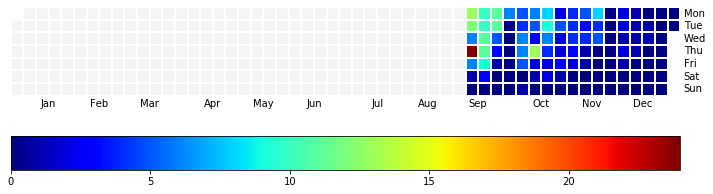

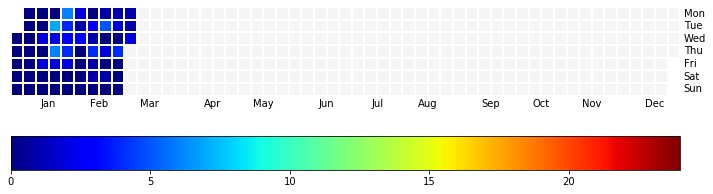

In [16]:
#@title
import calmap #The Calendar (heat) map package is imported to provide higher quality visualization than bargraphs
#https://pythonhosted.org/calmap/#'
#plt.figure(figsize=(12,18))
#calmap.yearplot(df_mdy, year=2019, daylabels='MTWTRFSS')
#plt.show()

print('Calendar Map of ELC Sign-ins for Fall 2019')
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
cax = calmap.yearplot(obj_mdy, year=2019, ax=ax, cmap='jet')
fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')

print('\n\n\n')

print('Calendar Map of ELC Sign-ins for Spring 2020')
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
cax = calmap.yearplot(obj_mdy, year=20, ax=ax, cmap='jet')
fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal')

## Sign-ins by course: 

Statics (MEEM2110) help was the most used service.  Since 2018, it has been an ELC policy to ensure that all coaches hired are proficient in Statics.

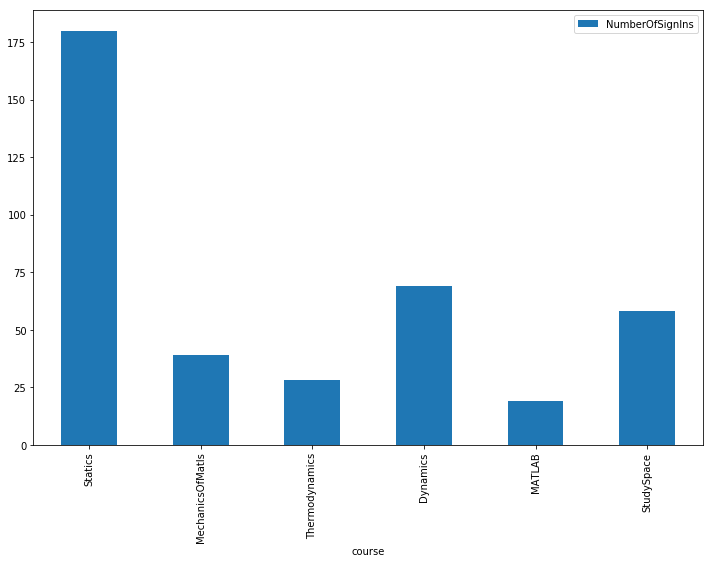

In [29]:
#@title
obj_course = df['visits'].groupby(df['visits']).count()

course_data = np.array(obj_course)
#df_course = pd.DataFrame({'course': ['Statics', 'MechanicsOfMatls', 'Thermodynamics','Dynamics', 'MATLAB', 'StudySpace'],
#                          'NumberOfSignins' : course_data})


#print(course_data)
df_course = pd.DataFrame({'course': ['Statics', 'MechanicsOfMatls', 'Thermodynamics','Dynamics', 'MATLAB', 'StudySpace'],
                          'NumberOfSignIns': course_data[0:6]})
df_course.plot.bar(x='course', y='NumberOfSignIns', rot=90,figsize=(12,8))
plt.show()

fig = px.bar(df_course, x="course", y="NumberOfSignIns")
fig.show()

## Sign-ins by hour of day

Afternoon hours were the most popular time (pre-COVID19) for students to visit the ELC.  Since 2018, ELC has been staffed with ~50% more coaches during the 12-3pm time period, as compared to other periods.

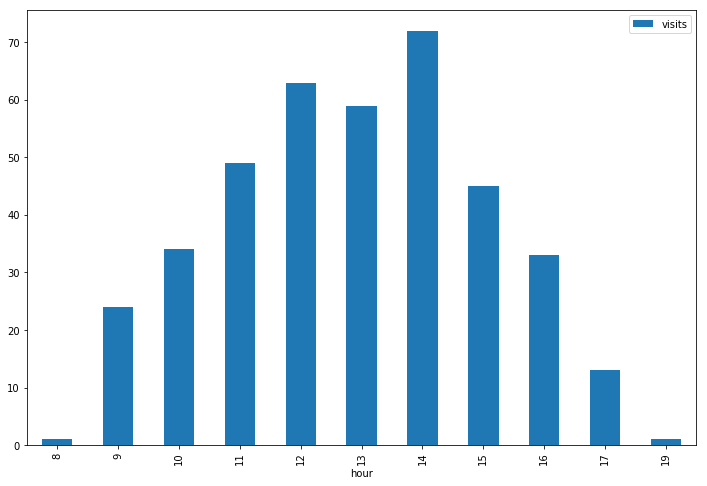

In [30]:
#@title
obj_hr = df['visits'].groupby(df['hour']).count() #Grouping number of visits by hour
xdata = np.array(obj_hr.reset_index())[:,0]
ydata = np.array(obj_hr.reset_index())[:,1]

df_hr = pd.DataFrame({'hour': xdata, 'visits': ydata})
fig = px.bar(df_hr, x="hour", y="visits")
fig.show()


df_hr.plot.bar(x='hour', y='visits', rot=90,figsize=(12,8))
plt.show()
#df_hr.head(10) #What does this grouped data look like?
#plt.xlabel('Hour of day')
#plt.ylabel('Total number of sign-ins')

#ax2 = df_hr.plot(kind='bar')
#plt.plot()

## Sign-ins by day of week

Monday thru Thursday are when most of the sign-ins are recorded.  The leanest day of week is Saturdays.  This lean usage has been recorded since Spring 2018.  To ensure that the ELC has more coaches during Mon-Thur, Saturday's have the lowest operating hours and coaching staff.

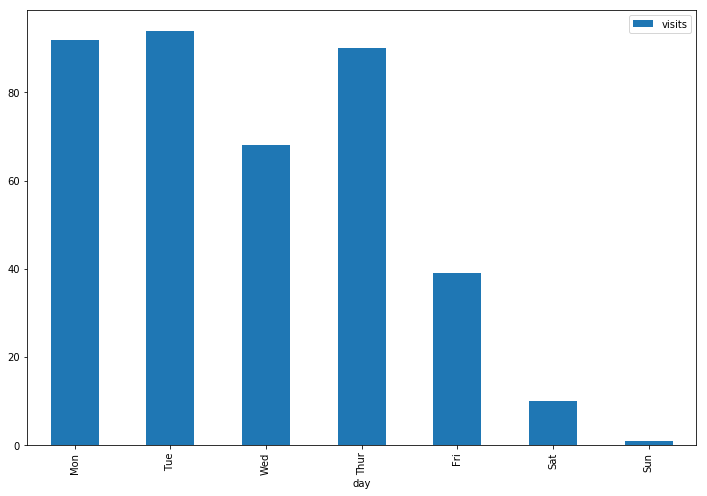

In [31]:
#@title
obj_day = df['visits'].groupby(df['day']).count() #Grouping number of visits by day
#df_day.head(10) #What does this grouped data look like?

xdata = np.array(obj_day.reset_index())[:,0]
ydata = np.array(obj_day.reset_index())[:,1]

df_day = pd.DataFrame({'day': xdata, 'visits': ydata})
df_day["day"] = df_day["day"].replace({1:'Mon', 2:'Tue', 3:'Wed',
                                       4:'Thur', 5:'Fri', 6:'Sat',
                                       7:'Sun'})
fig = px.bar(df_day, x="day", y="visits")
fig.show()

df_day.plot.bar(x='day', y='visits', rot=90,figsize=(12,8))
plt.show()


#obj_day.plot(kind='bar')
#locs, labels = plt.xticks()
#plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), rotation=45)
#plt.xlabel('Day of week')
#plt.ylabel('Total sign-ins')
#plt.plot()

## Sign-ins by month

Since 2018, the month of September has had the most sign-ins.  This is due to a week-2 influx of Mechanics of Materials student visits for Statics help.

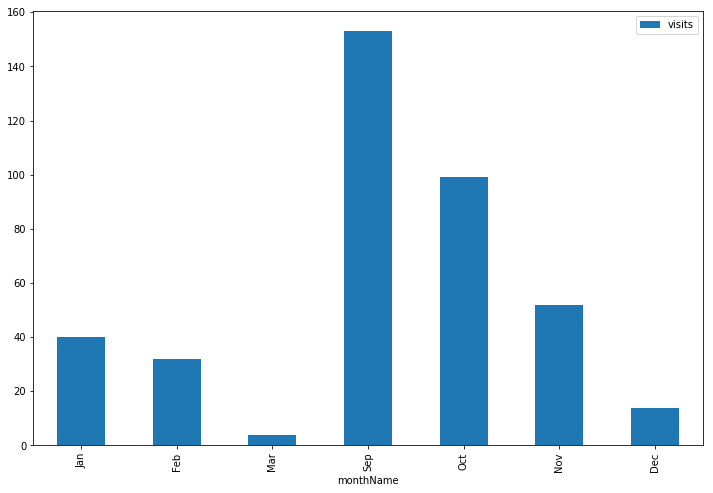

In [32]:
#@title
obj_month = df['visits'].groupby(df['month']).count() #Grouping number of visits by day
#print(df_month.head(10)) #What does this grouped data look like?

xdata = np.array(obj_month.reset_index())[:,0]
ydata = np.array(obj_month.reset_index())[:,1]

df_month = pd.DataFrame({'month': xdata, 'visits': ydata})
df_month["monthName"]=['Jan', 'Feb', 'Mar','Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(df_month, x="monthName", y="visits")
fig.show()


df_month.plot.bar(x='monthName', y='visits', rot=90,figsize=(12,8))
plt.show()

#ax = dobj_month.plot(kind='bar')
#ax.set_xticklabels(df_mdy.tail(n).index.strftime('%b-%d-%y'));
#ax.set_xticks(np.arange(df_month.shape[0]), ('Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Aug', 'Sep', 'Nov'));
#plt.xticks(np.arange(obj_month.shape[0]), ('Sep', 'Oct', 'Nov', 'Dec'), rotation=90)
#plt.xlabel('Month')
#plt.ylabel('Number of sign-ins')
#plt.show()

## Grouping of data by (visits, day, hour): 3D scatter plot

# Financial data


Cost per hour and number of coaches per hour, in any given regular week (week 2 - week before final exams).  A **zero or NaN entry** in a table suggests that the ELC is not open during those hours.

The actual ELC expenditure on coach salaries was recorded as $26,041.38 for AY 2019-2020.  The initial estimate was $27618.13.  Since it took 1 week to restart the ELC after COVID19 closure, this reflected as approximately ~$1577.  The ELC coach salaries amount to approximately ~$1000 a week.

In [33]:
#@title
#url4 = 'https://raw.githubusercontent.com/dnaneet/ELC/master/DATA/expenses_f19.csv'
#df4 = pd.read_csv(url4, error_bad_lines=False)
df4 = pd.read_csv('expenses_ay1920.csv', error_bad_lines=False)
print('ELC Expenses ($) on wages for AY 19-20')
print(tabulate(df4, headers='keys', tablefmt='psql'))

print('\n\n\n')

url2='https://raw.githubusercontent.com/dnaneet/ELC/master/DATA/ay1920_costperhour.csv'
df2 = pd.read_csv(url2)
print('Average cost ($) per hour by hour of day, for the semester')
print(tabulate(df2, headers='keys', tablefmt='psql'))
#print('Mean cost per day ($):\n')
#print(df2.mean())

print('\n\n\n')

print('Average (rounded) number of coaches per hour')
url3='https://raw.githubusercontent.com/dnaneet/ELC/master/DATA/ay1920_num_coaches_per_hr.csv'
df3 = pd.read_csv(url3)
print(tabulate(df3, headers='keys', tablefmt='psql'))

b'Skipping line 7: expected 3 fields, saw 4\n'


ELC Expenses ($) on wages for AY 19-20
+----+-----------------------------------------------+-------------+---------------------------+
|    | Unnamed: 0                                    | Actual      | Estimate                  |
|----+-----------------------------------------------+-------------+---------------------------|
|  0 | Fall 2019 Total Expenditure (D)               | 13966.00    | 13700.00                  |
|  1 | **********************************            | *********** | ************************* |
|  2 | Spring 2020                                   | Actual      | Estimate w/o COVID19      |
|  3 | **********************************            | *********** | ************************* |
|  4 | Spring 2020 Projection (G)                    | 13966.00    | 13966.00                  |
|  5 | Spring 2020 wages (Excep. Hrs.)               | 1316.65     | 1316.65                   |
|  6 | Spring 2020 Total wages (H)                   | 12075.38    | 13652.13           

---
End of File